In [1]:
# import libraries
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
#set style to whitegrid
sns.set(style="whitegrid")
plt.style.use("ggplot")


In [4]:
#load dataset
df=pd.read_csv('city_day.csv')
df['Date']=pd.to_datetime(df['Date'])
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
#find missing values
missing=df.isnull().sum()
print('missing values:\n',missing[missing>0])

missing values:
 PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [6]:
df.fillna(method='ffill',inplace=True)

C:\Users\AnjanaK\AppData\Local\Temp\ipykernel_6352\4116506308.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)


In [7]:
cities = ['Delhi', 'Mumbai', 'Kolkata', 'Chennai', 'Bengaluru']
df_cities = df[df['City'].isin(cities)]
df_cities



,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
4294,Bengaluru,2015-01-01,57.67,100.99,3.26,17.33,10.88,20.36,0.33,3.54,10.73,0.56,4.64,8.82,78.0,Satisfactory
4295,Bengaluru,2015-01-02,57.67,100.99,6.05,19.73,14.14,23.74,1.35,3.97,22.77,0.65,5.31,8.82,78.0,Satisfactory
4296,Bengaluru,2015-01-03,57.67,100.99,11.91,19.88,20.72,4.32,17.40,13.61,12.03,0.53,19.25,8.82,78.0,Satisfactory
4297,Bengaluru,2015-01-04,57.67,100.99,7.45,21.61,16.88,0.87,5.05,6.52,17.70,0.55,7.47,8.82,78.0,Satisfactory
4298,Bengaluru,2015-01-05,57.67,100.99,9.52,22.17,21.76,31.38,1.83,4.71,12.72,0.40,4.36,8.82,78.0,Satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23859,Mumbai,2020-06-27,18.04,63.72,28.29,8.58,36.07,26.69,0.43,10.36,5.68,0.82,1.44,0.45,64.0,Satisfactory
23860,Mumbai,2020-06-28,12.33,44.84,27.15,8.06,34.78,26.50,0.38,10.58,5.76,0.85,1.44,0.45,64.0,Satisfactory
23861,Mumbai,2020-06-29,7.88,27.51,26.58,7.94,34.42,23.94,0.38,11.11,5.84,0.47,1.44,0.45,54.0,Satisfactory
23862,Mumbai,2020-06-30,4.66,13.87,25.25,8.02,33.25,19.89,0.36,13.40,6.94,0.73,1.44,0.45,54.0,Satisfactory


### PM2.5 Levels Over Time

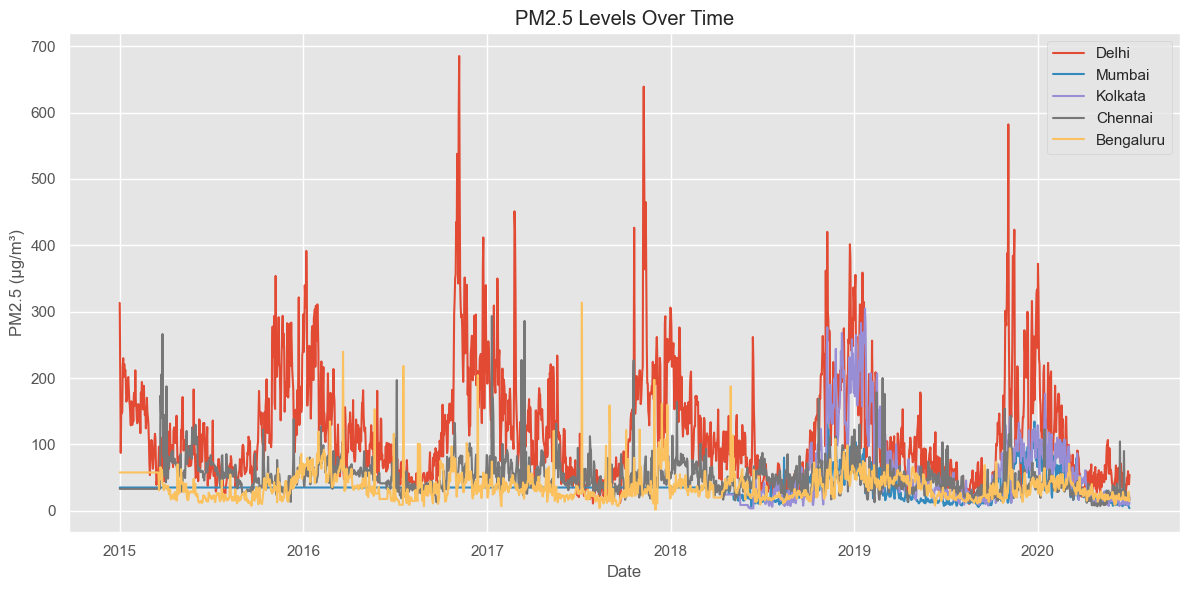

In [8]:
plt.figure(figsize=(12, 6))
for city in cities:
    city_data = df_cities[df_cities['City'] == city]
    plt.plot(city_data['Date'], city_data['PM2.5'], label=city)

plt.title('PM2.5 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.tight_layout()
plt.show()


#### Delhi consistently shows the highest PM2.5 levels with pronounced winter spikes, indicating severe seasonal pollution. Mumbai and Chennai maintain relatively lower levels, suggesting better dispersion due to coastal geography. Kolkata shows moderate pollution with occasional peaks.

### Average Pollutant Levels by City

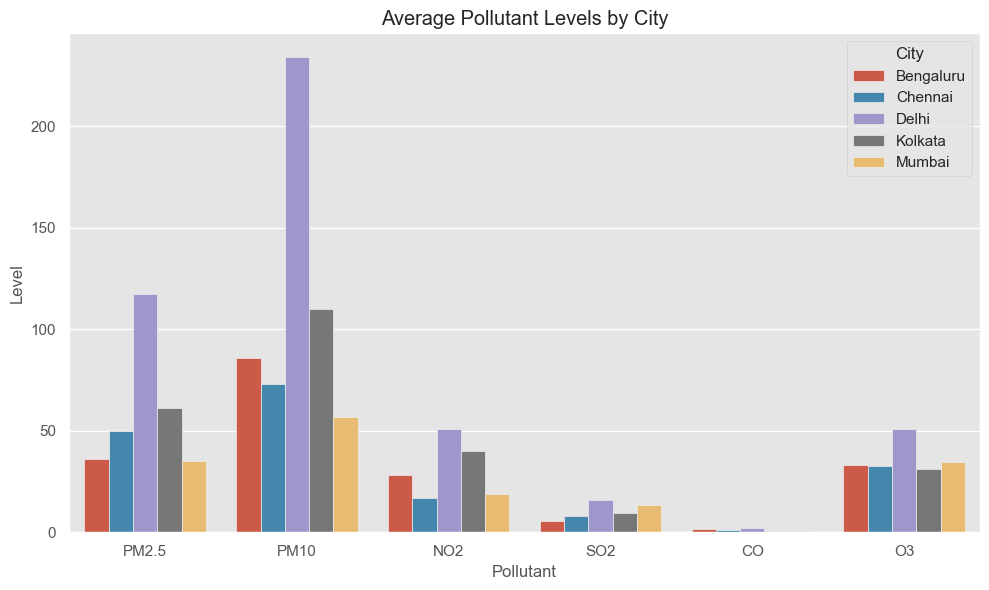

In [9]:
avg_pollutants = df_cities.groupby('City')[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']].mean().reset_index()
avg_pollutants = avg_pollutants.melt(id_vars='City', var_name='Pollutant', value_name='Level')

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_pollutants, x='Pollutant', y='Level', hue='City')
plt.title('Average Pollutant Levels by City')
plt.tight_layout()
plt.show()

#### Delhi exhibits the highest average levels of PM2.5 and PM10, indicating severe particulate pollution. Mumbai shows elevated PM10,PM2.5 and O3, likely due to traffic emissions. Chennai and Bengaluru have relatively lower pollutant levels across the board, suggesting better air quality and dispersion conditions.

### Correlation between Pollutants

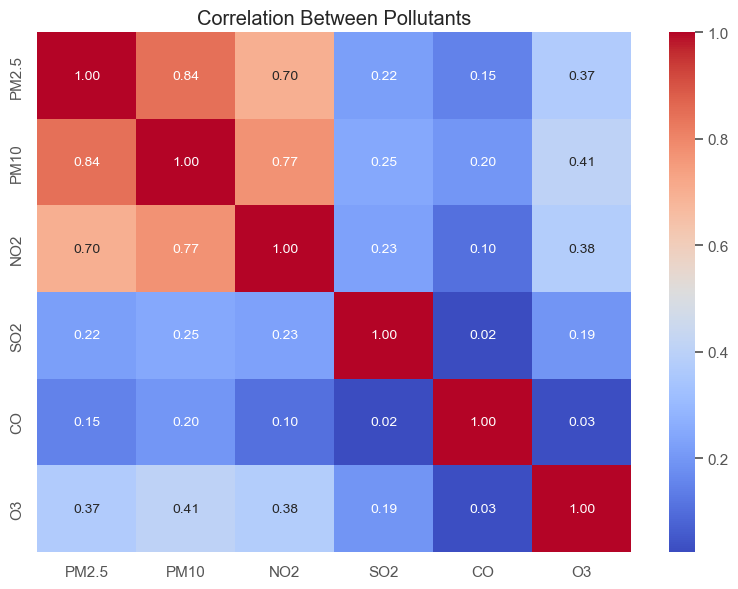

In [10]:
corr = df_cities[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Pollutants')
plt.tight_layout()
plt.show()

####  PM2.5, PM10, and NO2 are closely linked. They often come from the same sources like vehicles and factories.
- CO also connects moderately with these, showing it shares some sources too.
- O3 (ozone) has a weaker link, but still shows some connection—likely because it forms from other gases in sunlight.
- SO2 stands out. It doesn’t relate much to the others, meaning it likely comes from different sources like coal burning.

 


### Monthly PM2.5 Distribution

C:\Users\AnjanaK\AppData\Local\Temp\ipykernel_6352\2968364422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cities['Month'] = df_cities['Date'].dt.month


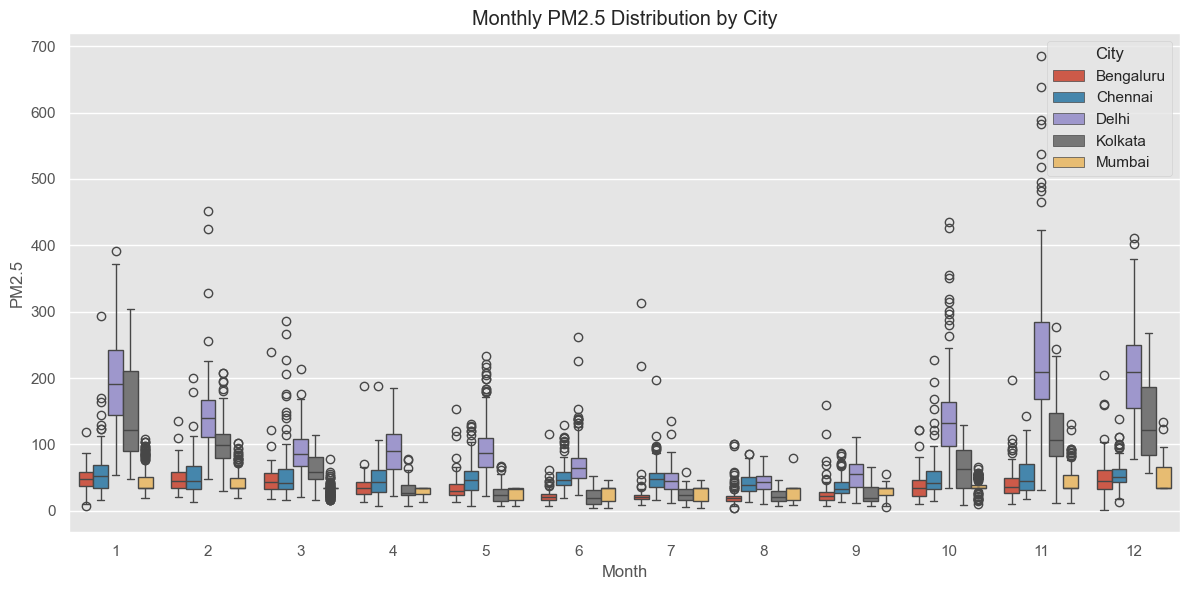

In [11]:
df_cities['Month'] = df_cities['Date'].dt.month

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cities, x='Month', y='PM2.5', hue='City')
plt.title('Monthly PM2.5 Distribution by City')
plt.tight_layout()
plt.show()

#### Air pollution is seasonal and region-specific. Northern cities like Delhi and Kolkata need targeted winter interventions, while southern cities maintain relatively better air quality year-round.


### Monthly Average Pollution Trends

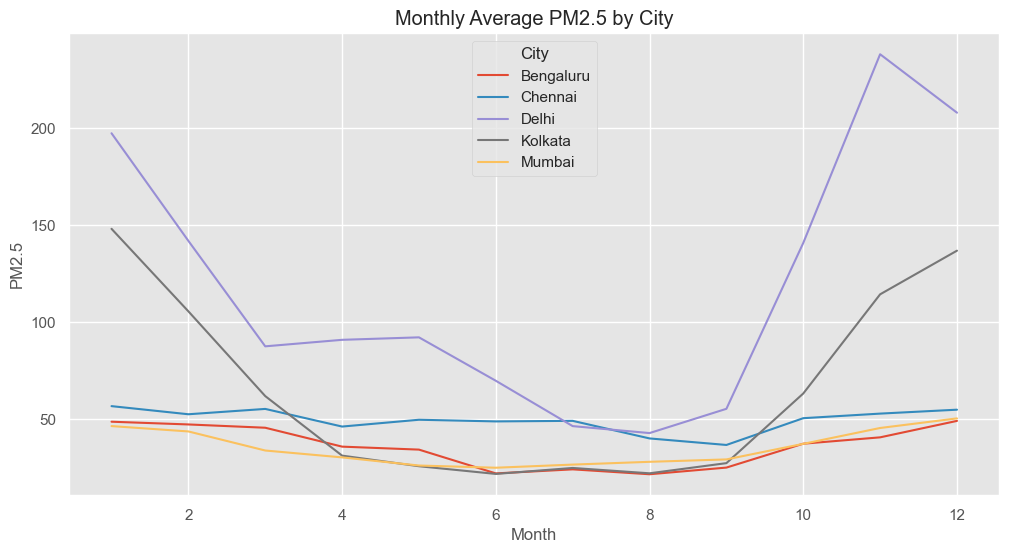

In [12]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
monthly_avg = df_cities.groupby(['City', 'Month'])['PM2.5'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='Month', y='PM2.5', hue='City')
plt.title("Monthly Average PM2.5 by City")
plt.show()

#### Delhi has the highest PM2.5 levels throughout the year, with a sharp peak in December, indicating severe winter pollution.
- Kolkata shows the second-highest levels, also rising in winter but less extreme than Delhi.
- Mumbai, Chennai, and Bengaluru have lower and more stable PM2.5, suggesting better air quality year-round.




### Yearly Pollution Trends

C:\Users\AnjanaK\AppData\Local\Temp\ipykernel_6352\2798038431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cities['Year'] = pd.to_datetime(df_cities['Date']).dt.year


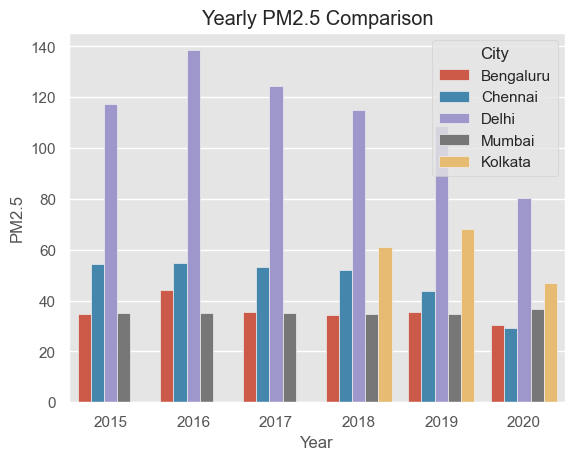

In [13]:
df_cities['Year'] = pd.to_datetime(df_cities['Date']).dt.year
yearly_avg = df_cities.groupby(['City', 'Year'])['PM2.5'].mean().reset_index()

sns.barplot(data=yearly_avg, x='Year', y='PM2.5', hue='City')
plt.title("Yearly PM2.5 Comparison")
plt.show()

#### Delhi has the highest PM2.5 levels every year, showing severe pollution. Kolkata follows, while Mumbai and Chennai remain moderate. Bengaluru consistently has the cleanest air. No city shows strong improvement—Delhi’s pollution stays high, and only Kolkata and Bengaluru show slight declines.

### Pollution Category Distribution

Text(0.5, 1.0, 'Delhi AQI Category Distribution')

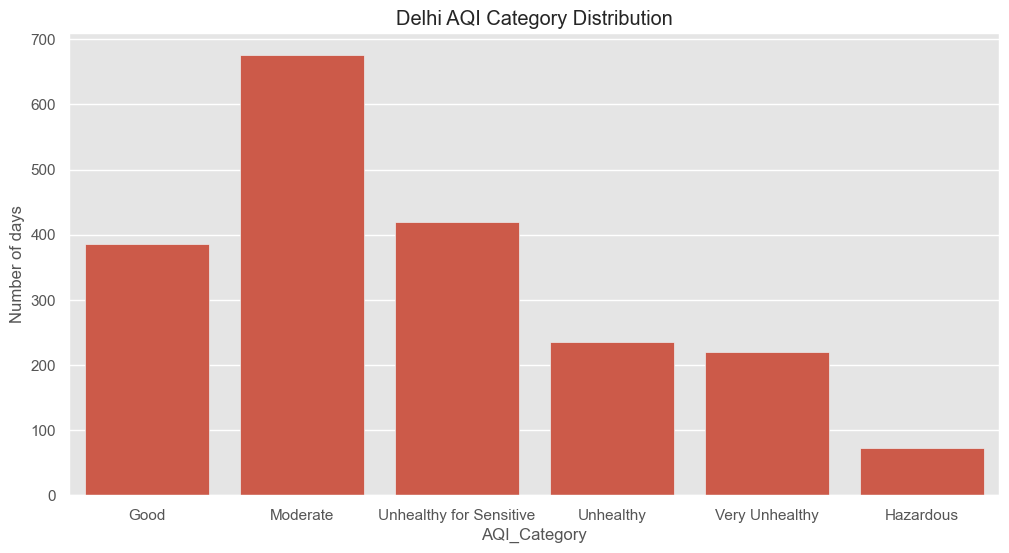

In [14]:
def classify_pm25(val):
    if val <= 50: return 'Good'
    elif val <= 100: return 'Moderate'
    elif val <= 150: return 'Unhealthy for Sensitive'
    elif val <= 200: return 'Unhealthy'
    elif val <= 300: return 'Very Unhealthy'
    else: return 'Hazardous'

df['AQI_Category'] = df['PM2.5'].apply(classify_pm25)
plt.figure(figsize=(12,6))
sns.countplot(data=df[df['City'] == 'Delhi'], x='AQI_Category', order=['Good','Moderate','Unhealthy for Sensitive','Unhealthy','Very Unhealthy','Hazardous'])
plt.ylabel('Number of days')
plt.title("Delhi AQI Category Distribution")

#### Most days in Delhi fall under Moderate and Unhealthy for Sensitive Groups, indicating frequent exposure to air that can affect vulnerable populations. There are also significant numbers of Unhealthy, Very Unhealthy, and even Hazardous days, showing serious air quality concerns. Truly good air days are relatively few.


### Top Polluted Days

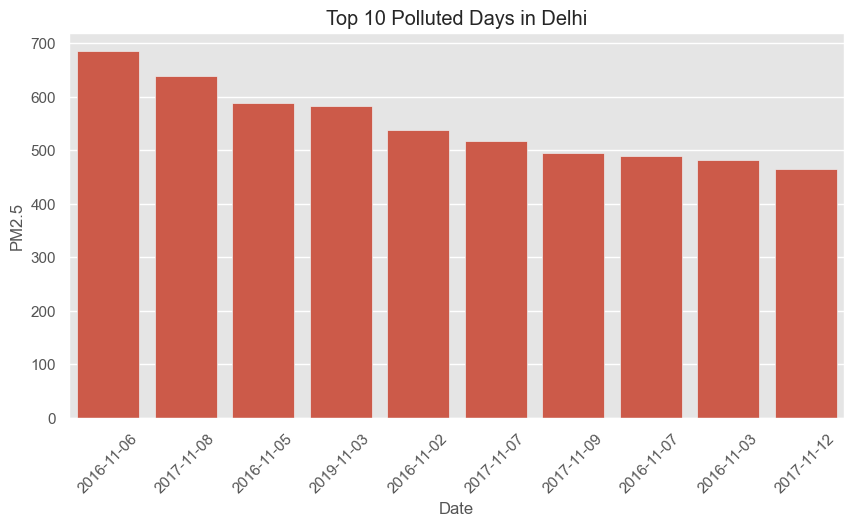

In [15]:
top_days = df[df['City'] == 'Delhi'].sort_values(by='PM2.5', ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(data=top_days, x='Date', y='PM2.5')
plt.xticks(rotation=45)
plt.title("Top 10 Polluted Days in Delhi")
plt.show()

#### Delhi’s most polluted days had PM2.5 levels exceeding 700, mainly in early November across multiple years. This suggests severe pollution spikes during post-Diwali and winter periods, posing major health risks.

### Comparison of cities with boxplots

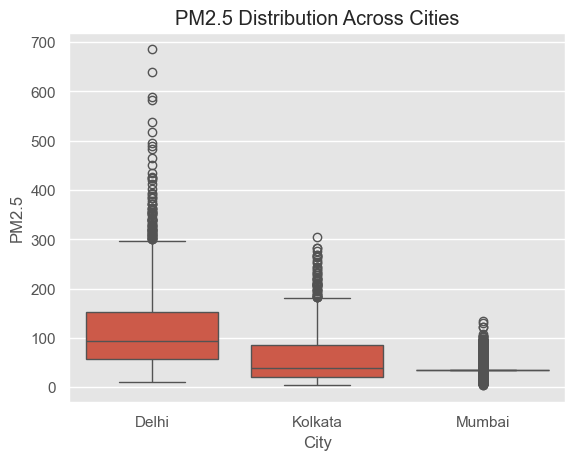

In [26]:
sns.boxplot(data=df[df['City'].isin(['Delhi', 'Mumbai', 'Kolkata'])], x='City', y='PM2.5')
plt.title("PM2.5 Distribution Across Cities")
plt.show()

#### Delhi shows the highest median and widest spread of PM2.5 levels, with many extreme outliers, indicating both consistently high pollution and frequent severe spikes. Mumbai and Kolkata have lower medians and narrower IQRs, suggesting relatively better and more stable air quality.

### Trend smoothing with Rolling Average

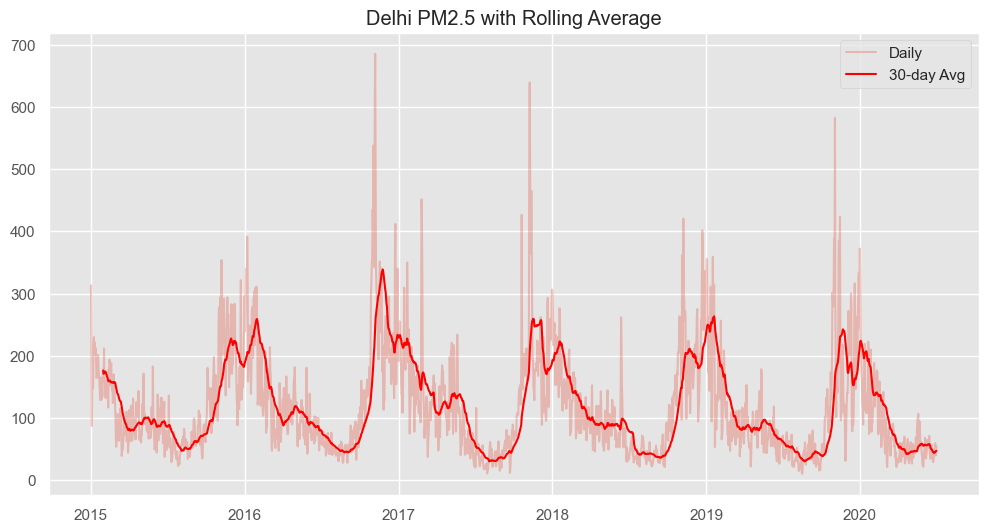

In [27]:
delhi = df[df['City'] == 'Delhi'].copy()
delhi['PM2.5_Rolling'] = delhi['PM2.5'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(delhi['Date'], delhi['PM2.5'], alpha=0.3, label='Daily')
plt.plot(delhi['Date'], delhi['PM2.5_Rolling'], color='red', label='30-day Avg')
plt.title("Delhi PM2.5 with Rolling Average")
plt.legend()
plt.show()

#### The 30-day rolling average reveals that Delhi experiences consistent PM2.5 peaks in winter, with levels often exceeding 200 µg/m³. While daily values fluctuate, the smoothed trend shows prolonged periods of unhealthy air, especially between November and January. A noticeable dip in 2020 suggests the impact of lockdown measures.

### Conclusion


 #### The AQI study shows clear seasonal variation, with winter months recording the poorest air quality. Elevated levels of PM2.5 and PM10 highlight serious health risks, especially respiratory and cardiovascular issues. These findings stress the need for stricter emission controls and public awareness, making AQI a vital tool for both policy and community action.